# Data Visualization: Ford GoBike System Data

## by Abdulaziz Almanna


#### Table of Contents:
1. Introduction
2. Preliminary Wrangling
3. Univariate Exploration
4. Bivariate Exploration
5. Multivariate Exploration

## Preliminary Wrangling

> his document explores a dataset including time, stations, and users' attributes for 183412 trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
df.head(10)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


#### add Age column and trip day

In [4]:
# https://www.journaldev.com/23365/python-string-to-datetime-strptime 
# here we used this method to calc time 

df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [5]:
# add Age column and trip day

df['age'] = 2019 - df['member_birth_year']
df['trip_day'] = df.start_time.dt.strftime('%a')

In [6]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,trip_day
73246,685,2019-02-19 14:18:36.097,2019-02-19 14:30:01.097,168.0,Alcatraz Ave at Shattuck Ave,37.849595,-122.265569,156.0,Stanford Ave at Hollis St,37.838443,-122.288665,5104,Subscriber,1984.0,Male,Yes,35.0,Tue
133904,218,2019-02-08 18:15:13.353,2019-02-08 18:18:51.401,120.0,Mission Dolores Park,37.761420,-122.426435,121.0,Mission Playground,37.759210,-122.421339,3434,Subscriber,1974.0,Female,No,45.0,Fri
27041,743,2019-02-25 10:15:25.938,2019-02-25 10:27:49.784,257.0,Fifth St at Delaware St,37.870407,-122.299676,245.0,Downtown Berkeley BART,37.870139,-122.268422,4542,Subscriber,1995.0,Male,Yes,24.0,Mon
135146,1227,2019-02-08 15:07:55.604,2019-02-08 15:28:23.054,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,130.0,22nd St Caltrain Station,37.757288,-122.392051,5532,Subscriber,1961.0,Male,No,58.0,Fri
54960,617,2019-02-21 11:28:38.888,2019-02-21 11:38:56.222,321.0,5th St at Folsom,37.780146,-122.403071,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,5863,Subscriber,2000.0,Male,No,19.0,Thu


#### drop columns we didn't want

In [7]:
# drob some column we don't use

df.drop(axis=1, columns=['start_station_latitude','start_station_longitude', 'end_station_latitude', 
                         'end_station_longitude' ,'bike_share_for_all_trip'], inplace=True)

In [8]:
# check
print(df.shape)
print(df.describe())
df.head(10)

(183412, 13)
        duration_sec  start_station_id  end_station_id        bike_id  \
count  183412.000000     183215.000000   183215.000000  183412.000000   
mean      726.078435        138.590427      136.249123    4472.906375   
std      1794.389780        111.778864      111.515131    1664.383394   
min        61.000000          3.000000        3.000000      11.000000   
25%       325.000000         47.000000       44.000000    3777.000000   
50%       514.000000        104.000000      100.000000    4958.000000   
75%       796.000000        239.000000      235.000000    5502.000000   
max     85444.000000        398.000000      398.000000    6645.000000   

       member_birth_year            age  
count      175147.000000  175147.000000  
mean         1984.806437      34.193563  
std            10.116689      10.116689  
min          1878.000000      18.000000  
25%          1980.000000      27.000000  
50%          1987.000000      32.000000  
75%          1992.000000      39.00

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,age,trip_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,35.0,Thu
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,NaN,Thu
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,47.0,Thu
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,30.0,Thu
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,45.0,Thu
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,60.0,Thu
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,3803,Subscriber,1983.0,Female,36.0,Thu
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6329,Subscriber,1989.0,Male,30.0,Thu
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6548,Subscriber,1988.0,Other,31.0,Thu
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,121.0,Mission Playground,6488,Subscriber,1992.0,Male,27.0,Thu


### What is the structure of your dataset?

>There are 183412 ride data from 2019 in the dataset with 13 features duration_sec , start and end time, start station id and name an, end station id and name, bike id, customer type, birth year, gender, age and age group.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the duration of the trip



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that other factors such as user type, age, and gender will have an impact on the duration.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

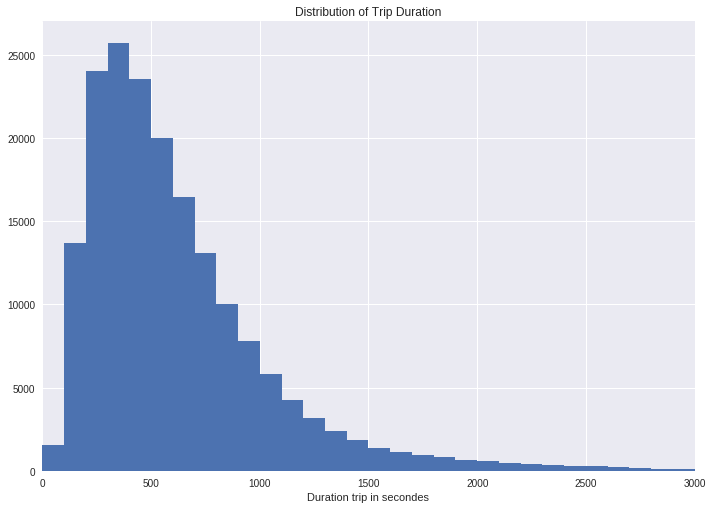

In [19]:
binss = np.arange(0, df['duration_sec'].max()+100, 100);
plt.figure(figsize = [ 11.69, 8.27])
plt.hist(data = df, x = 'duration_sec', bins = binss)
plt.xlim(0,3000)
plt.title("Distribution of Trip Duration")
plt.xlabel("Duration trip in secondes")

plt.show();

 The distribution is tilted to the right, with a very long tail I'm going to adjust the journey duration variable from second to minute.

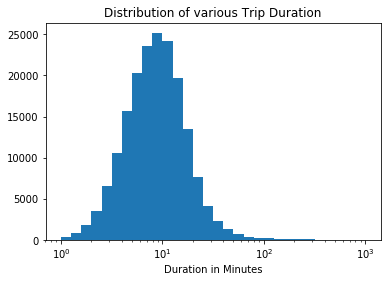

In [10]:
# Converting the trip durations from seconds to minutes 

df['duration_min'] = df['duration_sec'] / 60

binedges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df , x = 'duration_min' , bins = binedges);
plt.xticks(ticks,labels);
plt.title('Distribution of various Trip Duration')
plt.xlabel('Duration in Minutes');
plt.xscale('log');

The majority of bike riders are capable of utilizing their bikes for short-distance trips around 10 mins

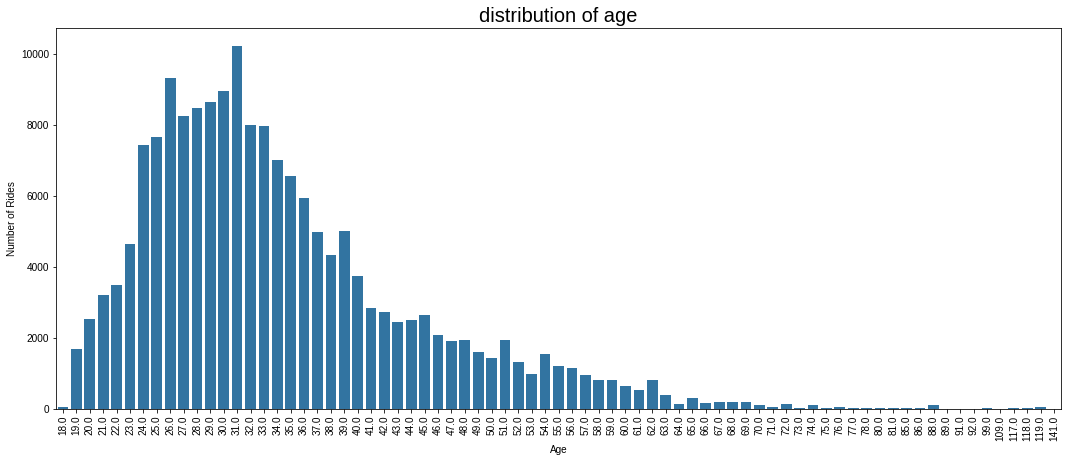

In [11]:

plt.figure(figsize = (18, 7))
df_samp = df.sample(183000)
base_color = sb.color_palette()[0]
sb.countplot(data = df_samp.sort_values(by='age'), x = 'age', color = base_color);

plt.title('distribution of age', fontsize = 20);
plt.xlabel('Age')
plt.ylabel('Number of Rides')
plt.xticks(rotation = 90);
plt.style.use('seaborn')

> The distribution is right-skewed, with a peak between the ages of 26 and 31, and the number of users falls as they get older.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Despite the fact that there is a distinct tendency with age, you might be shocked to learn that the crest is not located in the left tail. I expected it to begin in my early twenties, but it began at the age of 24. 
The majority of bike riders are capable of utilizing their bikes for short-distance trips around 10 mins



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data was clean; all of the values were correct, and no additional processing was necessary to make it apparent; however, I did add one column, which is age.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

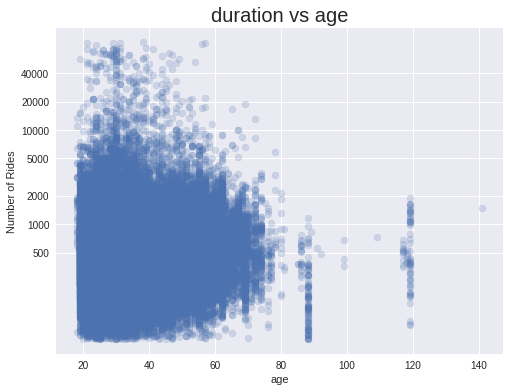

In [12]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'age', y = 'duration_sec', alpha = 2/10)
plt.title('duration vs age', fontsize = 20);
plt.xlabel('age')
plt.yscale('log')
plt.yticks([500, 1000, 2000, 5000, 10000, 20000 , 40000], [500, '1000', '2000', '5000', '10000', '20000' ,'40000'])
plt.ylabel('Number of Rides')
plt.show()

I wanted to see how many rides people would take based on their age, so I plotted it in the scatterplot below. This, predictably, corresponds to our first histogram visual, in which the majority of the rides appear to be centered around the early 30's age range.

Text(0,0.5,'people')

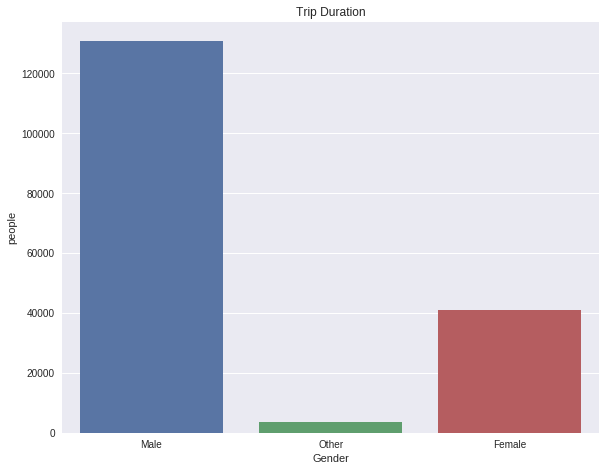

In [13]:
plt.figure(figsize=[ 9.63, 7.56])
plt.title('Trip Duration');
sb.countplot( data=df, x='member_gender' );

plt.xlabel('Gender')
plt.ylabel('people')

We note that the number of trips for men is three times more than women

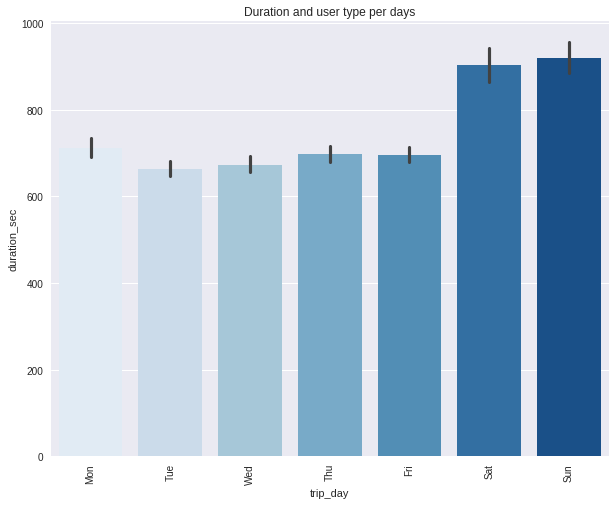

In [36]:
#list of days in order 
day_order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize = [10, 8])
sb.barplot(data = df , x = 'trip_day', y = 'duration_sec', palette = 'Blues', order = day_order)
plt.xticks(rotation=90)
plt.title('Duration and user type per days');
plt.show()

There is a relationship between the duration of bicycle trips on two days, Sunday and Saturday, but the rest of the days are at the normal rate

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

 
- We note that the number of trips for men is three times more than women
- This, predictably, corresponds to our first histogram visual, in which the majority of the rides appear to be centered around the early 30's age range.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- There is a relationship between the duration of bicycle trips on two days, Sunday and Saturday, but the rest of the days are at the normal rate

## Multivariate Exploration



#### Compare time and days for each gender

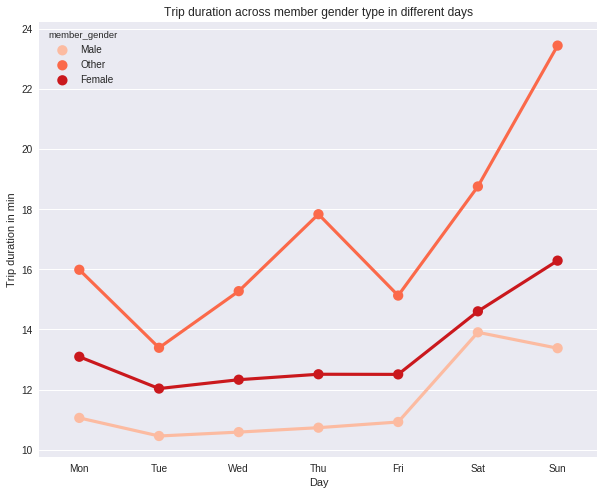

In [17]:
fig = plt.figure(figsize = [10,8])
sb.pointplot(data = df, x = 'trip_day', y = 'duration_min', hue = 'member_gender', palette = 'Reds', ci=None,
            order= day_order) 
plt.title('Trip duration across member gender type in different days')
plt.ylabel('Trip duration in min')
plt.xlabel('Day')
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- On the two days off, Saturday and Sunday, the duration of the trips is longer for everyone, unlike working days
- females always spend more time than male on trips 

### Were there any interesting or surprising interactions between features?
- We can see from the pointplot that female members have a substantially longer journey time than the other genders, This surprised me because males often have more stamina